In [27]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import matplotlib.pyplot as plt

In [2]:
df_work = pd.read_csv('datasets/candidatos_work.csv', sep=';')
df_work.drop(['composicao_legenda'],axis=1, inplace=True)
df_work.head()

,grau_instrucao,nacionalidade,concorre_reeleicao,declara_bens,despesa_maxima_campanha,idade_data_posse,eleito,cor_raca_AMARELA,cor_raca_BRANCA,cor_raca_INDIGENA,...,cargo_1o SUPLENTE SENADOR,cargo_2o SUPLENTE SENADOR,cargo_DEPUTADO DISTRITAL,cargo_DEPUTADO ESTADUAL,cargo_DEPUTADO FEDERAL,cargo_GOVERNADOR,cargo_PREFEITO,cargo_PRESIDENTE,cargo_SENADOR,cargo_VEREADOR
0,6,1,0,0,400000.0,45.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,8,1,0,1,1000000.0,50.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,8,1,0,1,690000.0,48.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,6,1,0,1,500000.0,39.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,1,0,0,500000.0,40.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [3]:
df_data = df_work.drop(['eleito'], axis=1)
df_labels = df_work.loc[:,['eleito']].values.ravel()
df_data.head()

,grau_instrucao,nacionalidade,concorre_reeleicao,declara_bens,despesa_maxima_campanha,idade_data_posse,cor_raca_AMARELA,cor_raca_BRANCA,cor_raca_INDIGENA,cor_raca_PARDA,...,cargo_1o SUPLENTE SENADOR,cargo_2o SUPLENTE SENADOR,cargo_DEPUTADO DISTRITAL,cargo_DEPUTADO ESTADUAL,cargo_DEPUTADO FEDERAL,cargo_GOVERNADOR,cargo_PREFEITO,cargo_PRESIDENTE,cargo_SENADOR,cargo_VEREADOR
0,6,1,0,0,400000.0,45.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,8,1,0,1,1000000.0,50.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,8,1,0,1,690000.0,48.0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,6,1,0,1,500000.0,39.0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,8,1,0,0,500000.0,40.0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [4]:
unique_elements, counts_elements = np.unique(df_labels, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     0      1]
 [434685  66819]]


In [18]:
np_scaled = StandardScaler().fit_transform(df_data)
df_scaled = pd.DataFrame(np_scaled, index=df_data.index, columns=df_data.columns)
df_scaled.head()

c:\users\yami_\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\yami_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,grau_instrucao,nacionalidade,concorre_reeleicao,declara_bens,despesa_maxima_campanha,idade_data_posse,cor_raca_AMARELA,cor_raca_BRANCA,cor_raca_INDIGENA,cor_raca_PARDA,...,cargo_1o SUPLENTE SENADOR,cargo_2o SUPLENTE SENADOR,cargo_DEPUTADO DISTRITAL,cargo_DEPUTADO ESTADUAL,cargo_DEPUTADO FEDERAL,cargo_GOVERNADOR,cargo_PREFEITO,cargo_PRESIDENTE,cargo_SENADOR,cargo_VEREADOR
0,0.186152,-0.05375,-0.325391,-1.351565,0.213799,0.008173,-0.066394,-1.032355,-0.058613,-0.795980,...,-0.031177,-0.031209,-0.061636,3.914173,-0.167636,-0.026653,-0.180196,-0.0072,-0.031209,-2.615722
1,1.313575,-0.05375,-0.325391,0.739883,0.678450,0.442036,-0.066394,0.968659,-0.058613,-0.795980,...,-0.031177,-0.031209,-0.061636,3.914173,-0.167636,-0.026653,-0.180196,-0.0072,-0.031209,-2.615722
2,1.313575,-0.05375,-0.325391,0.739883,0.438381,0.268490,-0.066394,-1.032355,-0.058613,1.256312,...,-0.031177,-0.031209,-0.061636,3.914173,-0.167636,-0.026653,-0.180196,-0.0072,-0.031209,-2.615722
3,0.186152,-0.05375,-0.325391,0.739883,0.291241,-0.512463,-0.066394,-1.032355,-0.058613,1.256312,...,-0.031177,-0.031209,-0.061636,3.914173,-0.167636,-0.026653,-0.180196,-0.0072,-0.031209,-2.615722
4,1.313575,-0.05375,-0.325391,-1.351565,0.291241,-0.425690,-0.066394,-1.032355,-0.058613,1.256312,...,-0.031177,-0.031209,-0.061636,3.914173,-0.167636,-0.026653,-0.180196,-0.0072,-0.031209,-2.615722


In [19]:
data_train, data_test, labels_train, labels_test = train_test_split(df_scaled, df_labels, test_size=0.2)

In [20]:
pca = decomposition.PCA(n_components=2)
pca_columns=['Component_1', 'Component_2']

data_train_pca = pd.DataFrame(pca.fit_transform(data_train), index=data_train.index, columns=pca_columns)
data_test_pca = pd.DataFrame(pca.transform(data_test), index=data_test.index, columns=pca_columns)

print(pca.explained_variance_ratio_[0])
print(pca.explained_variance_ratio_[1])

0.009387037377342658
0.007971408544608411


## Multilayer Perceptron

In [33]:
mlpc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlpc.fit(data_train_pca, labels_train)
mlpc_pred = mlpc.predict(data_test_pca)
mlpc_proba = mlpc.predict_proba(data_test_pca)

In [10]:
unique_elements, counts_elements = np.unique(mlpc_pred, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[    0     1]
 [95853  4448]]


In [12]:
mlpc_accuracy = accuracy_score(labels_test, mlpc_pred)
mlpc_precision = precision_score(labels_test, mlpc_pred, average='macro')
mlpc_recall = recall_score(labels_test, mlpc_pred, average='macro')
mlpc_f1 = f1_score(labels_test, mlpc_pred, average='macro')
mlpc_cm = confusion_matrix(labels_test, mlpc_pred)

print("Accuracy is {}%".format(mlpc_accuracy * 100))
print("Precision is {}%".format(mlpc_precision * 100))
print("Recall is {}%".format(mlpc_recall * 100))
print("F-1 is {}%".format(mlpc_f1 * 100))
print(mlpc_cm)

Accuracy is 87.00312060697301%
Precision is 71.34319832012703%
Recall is 57.81152785504741%
F-1 is 59.92611462810486%
[[84856  2039]
 [10997  2409]]


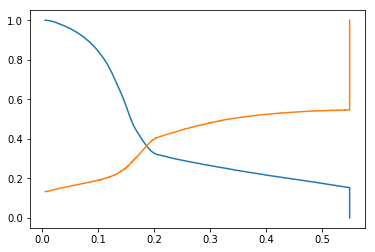

In [37]:
p, r, t = precision_recall_curve(labels_train, mlpc.predict_proba(data_train_pca)[:,1])
plt.plot(t,r[1:])
plt.plot(t,p[1:])

In [35]:
mlpcp_accuracy = accuracy_score(labels_test, mlpc_proba[:,1] > 0.19)
mlpcp_precision = precision_score(labels_test, mlpc_proba[:,1] > 0.19, average='macro')
mlpcp_recall = recall_score(labels_test, mlpc_proba[:,1] > 0.19, average='macro')
mlpcp_f1 = f1_score(labels_test, mlpc_proba[:,1] > 0.19, average='macro')
mlpcp_cm = confusion_matrix(labels_test, mlpc_proba[:,1] > 0.19)

print("Accuracy is {}%".format(mlpcp_accuracy * 100))
print("Precision is {}%".format(mlpcp_precision * 100))
print("Recall is {}%".format(mlpcp_recall * 100))
print("F-1 is {}%".format(mlpcp_f1 * 100))
print(mlpcp_cm)

Accuracy is 83.64622486316188%
Precision is 63.91167414314777%
Recall is 63.05678030400398%
F-1 is 63.4577661448174%
[[79225  7723]
 [ 8680  4673]]


## Random Forest Classifier

In [30]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rfc.fit(data_train_pca, labels_train)
rfc_pred = rfc.predict(data_test_pca)
rfc_proba = rfc.predict_proba(data_test_pca)

In [9]:
unique_elements, counts_elements = np.unique(rfc_pred, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[    0     1]
 [97699  2602]]


In [10]:
rfc_accuracy = accuracy_score(labels_test, rfc_pred)
rfc_precision = precision_score(labels_test, rfc_pred, average='macro')
rfc_recall = recall_score(labels_test, rfc_pred, average='macro')
rfc_f1 = f1_score(labels_test, rfc_pred, average='macro')
rfc_cm = confusion_matrix(labels_test, rfc_pred)

print("Accuracy is {}%".format(rfc_accuracy * 100))
print("Precision is {}%".format(rfc_precision * 100))
print("Recall is {}%".format(rfc_recall * 100))
print("F-1 is {}%".format(rfc_f1 * 100))
print(rfc_cm)

Accuracy is 86.96822564082113%
Precision is 72.26833815817567%
Recall is 54.85429107029576%
F-1 is 55.67604998288578%
[[85753  1125]
 [11946  1477]]


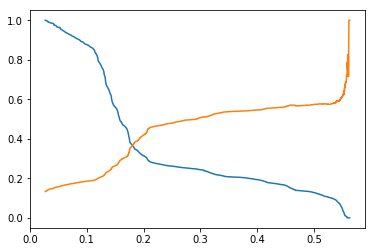

In [31]:
p, r, t = precision_recall_curve(labels_train, rfc.predict_proba(data_train_pca)[:,1])
plt.plot(t,r[1:])
plt.plot(t,p[1:])

In [32]:
rfcp_accuracy = accuracy_score(labels_test, rfc_proba[:,1] > 0.18)
rfcp_precision = precision_score(labels_test, rfc_proba[:,1] > 0.18, average='macro')
rfcp_recall = recall_score(labels_test, rfc_proba[:,1] > 0.18, average='macro')
rfcp_f1 = f1_score(labels_test, rfc_proba[:,1] > 0.18, average='macro')
rfcp_cm = confusion_matrix(labels_test, rfc_proba[:,1] > 0.18)

print("Accuracy is {}%".format(rfcp_accuracy * 100))
print("Precision is {}%".format(rfcp_precision * 100))
print("Recall is {}%".format(rfcp_recall * 100))
print("F-1 is {}%".format(rfcp_f1 * 100))
print(rfcp_cm)

Accuracy is 82.97025951884827%
Precision is 63.25464169097397%
Recall is 63.418044763189464%
F-1 is 63.335327300201016%
[[78310  8638]
 [ 8443  4910]]


## Logistic Regression

In [23]:
lrc = LogisticRegression(solver='lbfgs')
lrc.fit(data_train_pca, labels_train)
lrc_pred = lrc.predict(data_test_pca)
lrc_proba = lrc.predict_proba(data_test_pca)

In [24]:
unique_elements, counts_elements = np.unique(lrc_pred, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     0      1]
 [100027    274]]


In [25]:
lrc_accuracy = accuracy_score(labels_test, lrc_pred)
lrc_precision = precision_score(labels_test, lrc_pred, average='macro')
lrc_recall = recall_score(labels_test, lrc_pred, average='macro')
lrc_f1 = f1_score(labels_test, lrc_pred, average='macro')
lrc_cm = confusion_matrix(labels_test, lrc_pred)

print("Accuracy is {}%".format(lrc_accuracy * 100))
print("Precision is {}%".format(lrc_precision * 100))
print("Recall is {}%".format(lrc_recall * 100))
print("F-1 is {}%".format(lrc_f1 * 100))
print(lrc_cm)

Accuracy is 86.68108991934278%
Precision is 67.84483882782307%
Recall is 50.4212520143682%
F-1 is 47.41093916713036%
[[86808   140]
 [13219   134]]


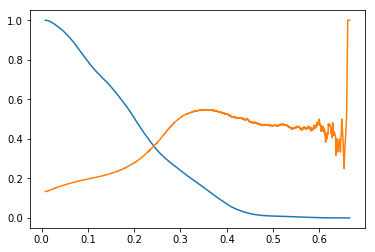

In [28]:
p, r, t = precision_recall_curve(labels_train, lrc.predict_proba(data_train_pca)[:,1])
plt.plot(t,r[1:])
plt.plot(t,p[1:])

In [29]:
lrcp_accuracy = accuracy_score(labels_test, lrc_proba[:,1] > 0.25)
lrcp_precision = precision_score(labels_test, lrc_proba[:,1] > 0.25, average='macro')
lrcp_recall = recall_score(labels_test, lrc_proba[:,1] > 0.25, average='macro')
lrcp_f1 = f1_score(labels_test, lrc_proba[:,1] > 0.25, average='macro')
lrcp_cm = confusion_matrix(labels_test, lrc_proba[:,1] > 0.25)

print("Accuracy is {}%".format(lrcp_accuracy * 100))
print("Precision is {}%".format(lrcp_precision * 100))
print("Recall is {}%".format(lrcp_recall * 100))
print("F-1 is {}%".format(lrcp_f1 * 100))
print(lrcp_cm)

Accuracy is 83.9572885614301%
Precision is 64.27362362179683%
Recall is 62.91608641228058%
F-1 is 63.529886395260846%
[[79638  7310]
 [ 8781  4572]]
